# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [30]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [32]:
with open("stsa-train.txt") as txtf:
    mylist = [line.rstrip('\n') for line in txtf]

labels = []
text = []

for i, line in enumerate(mylist):
    label = mylist[i][0]
    tex = mylist[i][1:]
    labels.append(label)
    text.append(tex)

dataset = pd.DataFrame(list(zip(labels, text)),columns =['Reviews', 'Text'])
dataset.head()

,Reviews,Text
0,1,"a stirring , funny and finally transporting r..."
1,0,apparently reassembled from the cutting-room ...
2,0,they presume their audience wo n't sit still ...
3,1,this is a visually stunning rumination on lov...
4,1,jonathan parker 's bartleby should have been ...


In [34]:
import nltk
nltk.download()
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


dataset['cleanText']=dataset['Text'].map(lambda s:preprocess(s))
dataset.head()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


,Reviews,Text,cleanText
0,1,"a stirring , funny and finally transporting r...",stirring funny finally transporting imagining ...
1,0,apparently reassembled from the cutting-room ...,apparently reassembled cutting room floor give...
2,0,they presume their audience wo n't sit still ...,presume audience sit still sociology lesson ho...
3,1,this is a visually stunning rumination on lov...,visually stunning rumination love memory histo...
4,1,jonathan parker 's bartleby should have been ...,jonathan parker bartleby end modern office ano...


In [35]:
with open("stsa-test.txt") as txtf:
    mylist_test = [line.rstrip('\n') for line in txtf]

labels_test = []
text_test = []

for i, line in enumerate(mylist_test):
    label_test = mylist_test[i][0]
    tex_test = mylist_test[i][1:]
    labels_test.append(label_test)
    text_test.append(tex_test)

dataset_test = pd.DataFrame(list(zip(labels_test, text_test)),columns =['Reviews', 'Text'])
dataset_test.head()

,Reviews,Text
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the ea..."
2,0,"gangs of new york is an unapologetic mess , w..."
3,0,we never really feel involved with the story ...
4,1,this is one of polanski 's best films .


In [36]:
import nltk
nltk.download()
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


dataset_test['cleanText']=dataset_test['Text'].map(lambda s:preprocess(s))
dataset_test.head()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> a
Command 'a' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Packag


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


,Reviews,Text,cleanText
0,0,"no movement , no yuks , not much of anything .",movement yuks much anything
1,0,"a gob of drivel so sickly sweet , even the ea...",gob drivel sickly sweet even eager consumers m...
2,0,"gangs of new york is an unapologetic mess , w...",gangs new york unapologetic mess whose saving ...
3,0,we never really feel involved with the story ...,never really feel involved story ideas remain ...
4,1,this is one of polanski 's best films .,one polanski best films


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(lowercase = False, analyzer='word')
train_tfidf = tfidf_vectorizer.fit_transform(dataset["cleanText"]).toarray()
test_tfidf = tfidf_vectorizer.transform(dataset_test["cleanText"]).toarray()

In [38]:
x_test = test_tfidf
y_test = dataset_test["Reviews"]

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_tfidf,dataset["Reviews"],test_size = 0.2, random_state = 202)

In [41]:
#Algorithms
#1.MultinominalNB
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
model = classifier.fit(x_train, y_train)
predictions_validation_set = classifier.predict(x_valid)


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print ("Accuracy of the Naive Bayes model on validation set is : ", round(accuracy_score(y_valid, predictions_validation_set)*100),"%")
print ("Percision of the Naive Bayes model on validation set is : ", round(precision_score(y_valid, predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the Naive Bayes model on validation set is : ", round(recall_score(y_valid, predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the Naive Bayes model on validation set is : ", round(f1_score(y_valid, predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the Naive Bayes model on validation set is :  78 %
Percision of the Naive Bayes model on validation set is :  83 %
Recall of the Naive Bayes model on validation set is :  69 %
F1 Score of the Naive Bayes model on validation set is :  76 %


In [42]:
from sklearn.metrics import classification_report

cr_naive_validation = classification_report(y_valid, predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_naive_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.83      0.69      0.76       667
           1       0.75      0.87      0.81       717

    accuracy                           0.78      1384
   macro avg       0.79      0.78      0.78      1384
weighted avg       0.79      0.78      0.78      1384



In [43]:

naive_accuracies_validation = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print(f"Naive Bayes Model  10-fold cross validation score on training set is :  {round(naive_accuracies_validation.mean()*100)}%")

Naive Bayes Model  10-fold cross validation score on training set is :  77%


In [44]:
predictions_test_set = classifier.predict(x_test)
print ("Accuracy of the Naive Bayes model on test set is : ", round(accuracy_score(y_test, predictions_test_set)*100),"%")
print ("Percision of the Naive Bayes model on validation set is : ", round(precision_score(y_test, predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Naive Bayes model on validation set is : ", round(recall_score(y_test, predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Naive Bayes model on validation set is : ", round(f1_score(y_test, predictions_test_set, pos_label='0')*100),"%")

Accuracy of the Naive Bayes model on test set is :  79 %
Percision of the Naive Bayes model on validation set is :  86 %
Recall of the Naive Bayes model on validation set is :  71 %
F1 Score of the Naive Bayes model on validation set is :  78 %


In [45]:
cr_naive_test = classification_report(y_test, predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_naive_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.86      0.71      0.78       912
           1       0.75      0.88      0.81       909

    accuracy                           0.79      1821
   macro avg       0.80      0.79      0.79      1821
weighted avg       0.80      0.79      0.79      1821



In [46]:
naive_accuracies_test = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10)

print(f"Naive Bayes Model 10-fold cross validation score on testing set is :  {round(naive_accuracies_test.mean()*100)}%")

Naive Bayes Model 10-fold cross validation score on testing set is :  73%


In [47]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors = 15)
model_knn = classifier_knn.fit(x_train, y_train)
knn_predictions_validation_set = classifier_knn.predict(x_valid)

print ("Accuracy of the KNN model on validation set is : ", round(accuracy_score(y_valid, knn_predictions_validation_set)*100),"%")
print ("Percision of the KNN model on validation set is : ", round(precision_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the KNN model on validation set is : ", round(recall_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the KNN model on validation set is : ", round(f1_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the KNN model on validation set is :  74 %
Percision of the KNN model on validation set is :  71 %
Recall of the KNN model on validation set is :  78 %
F1 Score of the KNN model on validation set is :  74 %


In [48]:
from sklearn.model_selection import cross_val_score
knn_accuracies_validation = cross_val_score(estimator = classifier_knn, X = x_train, y = y_train, cv = 10)

print(f"KNN Model  10-fold cross validation score on training set is :  {round(knn_accuracies_validation.mean()*100)}%")

KNN Model  10-fold cross validation score on training set is :  70%


In [49]:
knn_predictions_test_set = classifier_knn.predict(x_test)
print ("Accuracy of the KNN model on test set is : ", round(accuracy_score(y_test, knn_predictions_test_set)*100),"%")
print ("Percision of the KNN model on validation set is : ", round(precision_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the KNN model on validation set is : ", round(recall_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the KNN model on validation set is : ", round(f1_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the KNN model on test set is :  73 %
Percision of the KNN model on validation set is :  71 %
Recall of the KNN model on validation set is :  77 %
F1 Score of the KNN model on validation set is :  74 %


In [50]:
cr_knn_test = classification_report(y_test, knn_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_knn_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       912
           1       0.75      0.69      0.72       909

    accuracy                           0.73      1821
   macro avg       0.73      0.73      0.73      1821
weighted avg       0.73      0.73      0.73      1821



In [51]:
knn_accuracies_test = cross_val_score(estimator = classifier_knn, X = x_test, y = y_test, cv = 10)

print(f"KNN Model 10-fold cross validation score on testing set is :  {round(knn_accuracies_test.mean()*100)}%")

KNN Model 10-fold cross validation score on testing set is :  63%


In [52]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier()
model_dt = classifier_dt.fit(x_train, y_train)
dt_predictions_validation_set = classifier_dt.predict(x_valid)

print ("Accuracy of the Decison Tree Classifier model on validation set is : ", round(accuracy_score(y_valid, dt_predictions_validation_set)*100),"%")
print ("Percision of the Decison Tree Classifier model on validation set is : ", round(precision_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the Decison Tree Classifier model on validation set is : ", round(recall_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the Decison Tree Classifier model on validation set is : ", round(f1_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the Decison Tree Classifier model on validation set is :  66 %
Percision of the Decison Tree Classifier model on validation set is :  63 %
Recall of the Decison Tree Classifier model on validation set is :  71 %
F1 Score of the Decison Tree Classifier model on validation set is :  67 %


In [53]:
from sklearn.metrics import classification_report

cr_dt_validation = classification_report(y_valid, dt_predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_dt_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.63      0.71      0.67       667
           1       0.69      0.61      0.65       717

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384



In [54]:
from sklearn.model_selection import cross_val_score
dt_accuracies_validation = cross_val_score(estimator = classifier_dt, X = x_train, y = y_train, cv = 10)

print(f"Decison Tree Classifier Model  10-fold cross validation score on training set is :  {round(dt_accuracies_validation.mean()*100)}%")

Decison Tree Classifier Model  10-fold cross validation score on training set is :  66%


In [55]:
dt_predictions_test_set = classifier_dt.predict(x_test)
print ("Accuracy of the Decison Tree Classifier model on test set is : ", round(accuracy_score(y_test, dt_predictions_test_set)*100),"%")
print ("Percision of the Decison Tree Classifier model on validation set is : ", round(precision_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Decison Tree Classifier model on validation set is : ", round(recall_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Decison Tree Classifier model on validation set is : ", round(f1_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the Decison Tree Classifier model on test set is :  66 %
Percision of the Decison Tree Classifier model on validation set is :  64 %
Recall of the Decison Tree Classifier model on validation set is :  70 %
F1 Score of the Decison Tree Classifier model on validation set is :  67 %


In [56]:
cr_dt_test = classification_report(y_test, dt_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_dt_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.64      0.70      0.67       912
           1       0.67      0.61      0.64       909

    accuracy                           0.66      1821
   macro avg       0.66      0.66      0.66      1821
weighted avg       0.66      0.66      0.66      1821



In [57]:
dt_accuracies_test = cross_val_score(estimator = classifier_dt, X = x_test, y = y_test, cv = 10)

print(f"Decison Tree Classifier Model 10-fold cross validation score on testing set is :  {round(dt_accuracies_test.mean()*100)}%")

Decison Tree Classifier Model 10-fold cross validation score on testing set is :  62%


In [58]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()
model_rf = classifier_rf.fit(x_train, y_train)
rf_predictions_validation_set = classifier_rf.predict(x_valid)

print ("Accuracy of the Random Forest Classifier model on validation set is : ", round(accuracy_score(y_valid, rf_predictions_validation_set)*100),"%")
print ("Percision of the Random Forest Classifier model on validation set is : ", round(precision_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the Random Forest Classifier model on validation set is : ", round(recall_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest Classifier model on validation set is : ", round(f1_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the Random Forest Classifier model on validation set is :  73 %
Percision of the Random Forest Classifier model on validation set is :  71 %
Recall of the Random Forest Classifier model on validation set is :  74 %
F1 Score of the Random Forest Classifier model on validation set is :  72 %


In [59]:
from sklearn.metrics import classification_report

cr_rf_validation = classification_report(y_valid, rf_predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_rf_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       667
           1       0.75      0.72      0.73       717

    accuracy                           0.73      1384
   macro avg       0.73      0.73      0.73      1384
weighted avg       0.73      0.73      0.73      1384



In [60]:
from sklearn.model_selection import cross_val_score
rf_accuracies_validation = cross_val_score(estimator = classifier_rf, X = x_train, y = y_train, cv = 10)

print(f"Decison Random Forest Model  10-fold cross validation score on training set is :  {round(rf_accuracies_validation.mean()*100)}%")

Decison Random Forest Model  10-fold cross validation score on training set is :  73%


In [61]:
rf_predictions_test_set = classifier_rf.predict(x_test)
print ("Accuracy of the Random Forest Classifier model on test set is : ", round(accuracy_score(y_test, rf_predictions_test_set)*100),"%")
print ("Percision of the Random Forest Classifier model on validation set is : ", round(precision_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Random Forest Classifier model on validation set is : ", round(recall_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest Classifier model on validation set is : ", round(f1_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the Random Forest Classifier model on test set is :  74 %
Percision of the Random Forest Classifier model on validation set is :  74 %
Recall of the Random Forest Classifier model on validation set is :  76 %
F1 Score of the Random Forest Classifier model on validation set is :  75 %


In [62]:
cr_rf_test = classification_report(y_test, rf_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_rf_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       912
           1       0.75      0.73      0.74       909

    accuracy                           0.74      1821
   macro avg       0.74      0.74      0.74      1821
weighted avg       0.74      0.74      0.74      1821



In [63]:
rf_accuracies_test = cross_val_score(estimator = classifier_rf, X = x_test, y = y_test, cv = 10)

print(f"Random Forest Classifier Model 10-fold cross validation score on testing set is :  {round(rf_accuracies_test.mean()*100)}%")

Random Forest Classifier Model 10-fold cross validation score on testing set is :  66%


In [64]:
#XGBoost
'''from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()
model_xgb = classifier_xgb.fit(x_train, y_train)
xgb_predictions_validation_set = classifier_xgb.predict(x_valid)

print ("Accuracy of the XGBoost Classifier model on validation set is : ", round(accuracy_score(y_valid, xgb_predictions_validation_set)*100),"%")
print ("Percision of the XGBoost Classifier model on validation set is : ", round(precision_score(y_valid, xgb_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the XGBoost Classifier model on validation set is : ", round(recall_score(y_valid, xgb_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the XGBoost Classifier model on validation set is : ", round(f1_score(y_valid, xgb_predictions_validation_set, pos_label='0')*100),"%")
'''
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_train and y_valid are Pandas Series or NumPy arrays
# Convert string labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# Create and train XGBoost model
classifier_xgb = XGBClassifier()
model_xgb = classifier_xgb.fit(x_train, y_train_encoded)

# Make predictions on the validation set
xgb_predictions_validation_set = classifier_xgb.predict(x_valid)

# Calculate and print metrics
print("Accuracy of the XGBoost Classifier model on validation set is : ", round(accuracy_score(y_valid_encoded, xgb_predictions_validation_set) * 100), "%")
print("Precision of the XGBoost Classifier model on validation set is : ", round(precision_score(y_valid_encoded, xgb_predictions_validation_set) * 100), "%")
print("Recall of the XGBoost Classifier model on validation set is : ", round(recall_score(y_valid_encoded, xgb_predictions_validation_set) * 100), "%")
print("F1 Score of the XGBoost Classifier model on validation set is : ", round(f1_score(y_valid_encoded, xgb_predictions_validation_set) * 100), "%")



Accuracy of the XGBoost Classifier model on validation set is :  68 %
Precision of the XGBoost Classifier model on validation set is :  66 %
Recall of the XGBoost Classifier model on validation set is :  80 %
F1 Score of the XGBoost Classifier model on validation set is :  72 %


In [65]:
'''from sklearn.metrics import classification_report

cr_xgb_validation = classification_report(y_valid, xgb_predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_xgb_validation)
'''
from sklearn.metrics import classification_report

# Convert string labels to numeric values for y_valid
y_valid_encoded = label_encoder.transform(y_valid)

# Make predictions on the validation set
xgb_predictions_validation_set = classifier_xgb.predict(x_valid)

# Convert numeric labels back to string labels for classification_report
y_valid_str = label_encoder.inverse_transform(y_valid_encoded)
xgb_predictions_validation_set_str = label_encoder.inverse_transform(xgb_predictions_validation_set)

# Calculate and print classification report
cr_xgb_validation = classification_report(y_valid_str, xgb_predictions_validation_set_str)
print("Classification Report: ", "\n", "\n", cr_xgb_validation)


Classification Report:  
 
               precision    recall  f1-score   support

           0       0.72      0.56      0.63       667
           1       0.66      0.80      0.72       717

    accuracy                           0.68      1384
   macro avg       0.69      0.68      0.68      1384
weighted avg       0.69      0.68      0.68      1384



In [66]:
'''xgb_predictions_test_set = classifier_xgb.predict(x_test)
print ("Accuracy of the XGBoost Classifier model on test set is : ", round(accuracy_score(y_test, xgb_predictions_test_set)*100),"%")
print ("Percision of the XGBoost Classifier model on validation set is : ", round(precision_score(y_test, xgb_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the XGBoost Classifier model on validation set is : ", round(recall_score(y_test, xgb_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the XGBoost Classifier model on validation set is : ", round(f1_score(y_test, xgb_predictions_test_set, pos_label='0')*100),"%")
'''
xgb_predictions_test_set = classifier_xgb.predict(x_test)

# Convert string labels to numeric values for y_test
y_test_encoded = label_encoder.transform(y_test)

# Calculate and print metrics
print("Accuracy of the XGBoost Classifier model on test set is : ", round(accuracy_score(y_test_encoded, xgb_predictions_test_set) * 100), "%")
print("Precision of the XGBoost Classifier model on test set is : ", round(precision_score(y_test_encoded, xgb_predictions_test_set) * 100), "%")
print("Recall of the XGBoost Classifier model on test set is : ", round(recall_score(y_test_encoded, xgb_predictions_test_set) * 100), "%")
print("F1 Score of the XGBoost Classifier model on test set is : ", round(f1_score(y_test_encoded, xgb_predictions_test_set) * 100), "%")


Accuracy of the XGBoost Classifier model on test set is :  69 %
Precision of the XGBoost Classifier model on test set is :  66 %
Recall of the XGBoost Classifier model on test set is :  79 %
F1 Score of the XGBoost Classifier model on test set is :  72 %


In [67]:
'''cr_xgb_test = classification_report(y_test, xgb_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_xgb_test)
'''
from sklearn.metrics import classification_report

# Convert string labels to numeric values for y_test
y_test_encoded = label_encoder.transform(y_test)

# Convert numeric labels back to string labels for classification_report
y_test_str = label_encoder.inverse_transform(y_test_encoded)
xgb_predictions_test_set_str = label_encoder.inverse_transform(xgb_predictions_test_set)

# Calculate and print classification report
cr_xgb_test = classification_report(y_test_str, xgb_predictions_test_set_str)
print("Classification Report: ", "\n", "\n", cr_xgb_test)


Classification Report:  
 
               precision    recall  f1-score   support

           0       0.74      0.60      0.66       912
           1       0.66      0.79      0.72       909

    accuracy                           0.69      1821
   macro avg       0.70      0.69      0.69      1821
weighted avg       0.70      0.69      0.69      1821



In [68]:
'''xgb_accuracies_test = cross_val_score(estimator = classifier_xgb, X = x_test, y = y_test, cv = 10)

print(f"XGBoost Classifier Model 10-fold cross validation score on testing set is :  {round(xgb_accuracies_test.mean()*100)}%")
'''
from sklearn.model_selection import cross_val_score

# Convert string labels to numeric values for y_test
y_test_encoded = label_encoder.transform(y_test)

# Perform 10-fold cross-validation
xgb_accuracies_test = cross_val_score(estimator=classifier_xgb, X=x_test, y=y_test_encoded, cv=10)

# Print the cross-validation results
print(f"XGBoost Classifier Model 10-fold cross-validation score on testing set is: {round(xgb_accuracies_test.mean()*100)}%")


XGBoost Classifier Model 10-fold cross-validation score on testing set is: 64%


In [69]:
#SVM
from sklearn import svm

classifier_svm = svm.SVC()
model_svm = classifier_svm.fit(x_train, y_train)
svm_predictions_validation_set = classifier_svm.predict(x_valid)

print ("Accuracy of the SVM model on validation set is : ", round(accuracy_score(y_valid, svm_predictions_validation_set)*100),"%")
print ("Percision of the SVM model on validation set is : ", round(precision_score(y_valid, svm_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the SVM model on validation set is : ", round(recall_score(y_valid, svm_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the SVM model on validation set is : ", round(f1_score(y_valid, svm_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the SVM model on validation set is :  79 %
Percision of the SVM model on validation set is :  79 %
Recall of the SVM model on validation set is :  76 %
F1 Score of the SVM model on validation set is :  77 %


In [70]:
from sklearn.metrics import classification_report

cr_svm_validation = classification_report(y_valid, svm_predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_svm_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77       667
           1       0.78      0.82      0.80       717

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [71]:
from sklearn.model_selection import cross_val_score
svm_accuracies_validation = cross_val_score(estimator = classifier_svm, X = x_train, y = y_train, cv = 10)

print(f"SVM Model  10-fold cross validation score on training set is :  {round(svm_accuracies_validation.mean()*100)}%")

SVM Model  10-fold cross validation score on training set is :  77%


In [72]:
svm_predictions_test_set = classifier_svm.predict(x_test)
print ("Accuracy of the SVM model on test set is : ", round(accuracy_score(y_test, svm_predictions_test_set)*100),"%")
print ("Percision of the SVM model on validation set is : ", round(precision_score(y_test, svm_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the SVM model on validation set is : ", round(recall_score(y_test, svm_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the SVM model on validation set is : ", round(f1_score(y_test, svm_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the SVM model on test set is :  79 %
Percision of the SVM model on validation set is :  82 %
Recall of the SVM model on validation set is :  75 %
F1 Score of the SVM model on validation set is :  78 %


In [73]:
cr_svm_test = classification_report(y_test, svm_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_svm_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       912
           1       0.77      0.84      0.80       909

    accuracy                           0.79      1821
   macro avg       0.80      0.79      0.79      1821
weighted avg       0.80      0.79      0.79      1821



## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [1]:
import pandas as pd
file_path = '/content/Amazon_Unlocked_Mobile.csv'
df = pd.read_csv(file_path)

In [2]:
# Cleaning the data before beginning clustering
#lower casing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
from textblob import Word
nltk.download('wordnet')

df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Reviews'] = df['Reviews'].str.replace('[^\w\s]','')
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used (phone u & used hard all...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice grade pantach revue. clean se...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,work good go slow sometimes good phone love,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone. thing volume b...,0.0


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Read the data
file_path = '/content/Amazon_Unlocked_Mobile.csv'
df = pd.read_csv(file_path)

# Replace missing values with empty strings
df['Reviews'].fillna('', inplace=True)

# Vectorize the text data using TF-IDF
tfidf_vect = TfidfVectorizer()
tfidf_vects = tfidf_vect.fit_transform(df['Reviews'])

# Form clusters
num_clusters = 9
model = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=10000, random_state=50)
model.fit(tfidf_vects)

# Count the number of instances in each cluster
cluster_counts = pd.Series(model.labels_).value_counts()

# Print top words in each cluster
top_words = 7
feature_names = tfidf_vect.get_feature_names_out()
centroids = model.cluster_centers_.argsort()[:, ::-1]
for cluster_num in range(num_clusters):
    key_features = [feature_names[i] for i in centroids[cluster_num, :top_words]]
    print(f'Cluster {cluster_num+1}')
    print('Top Words:', key_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1
Top Words: ['love', 'it', 'phone', 'this', 'great', 'my', 'the']
Cluster 2
Top Words: ['excelente', 'producto', 'telefono', 'gracias', 'recomendado', 'celular', 'teléfono']
Cluster 3
Top Words: ['it', 'and', 'phone', 'to', 'was', 'the', 'my']
Cluster 4
Top Words: ['excellent', 'product', 'phone', 'very', 'recommend', 'good', 'seller']
Cluster 5
Top Words: ['good', 'very', 'phone', 'product', 'price', 'it', 'is']
Cluster 6
Top Words: ['great', 'phone', 'works', 'product', 'price', 'it', 'for']
Cluster 7
Top Words: ['the', 'phone', 'to', 'and', 'is', 'it', 'this']
Cluster 8
Top Words: ['perfect', 'condition', 'everything', 'works', 'it', 'was', 'phone']
Cluster 9
Top Words: ['phone', 'the', 'nice', 'very', 'good', 'and', 'great']


In [4]:
cluster_center=model.cluster_centers_
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.60664599e-04, 4.30795017e-05, 3.13419427e-06, ...,
        0.00000000e+00, 2.09092287e-05, 0.00000000e+00],
       ...,
       [1.28527638e-03, 1.62259331e-04, 2.07524629e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.43654367e-04, 2.15469809e-05, 9.25058512e-06, ...,
        6.70320196e-06, 2.17011153e-06, 5.22122746e-06]])

In [6]:
# Import necessary libraries
import gensim
import numpy as np

# Prepare the reviews list
reviews = [str(i).split() for i in df['Reviews']]

# Initialize Word2Vec model with the updated parameter name
w2v_model = gensim.models.Word2Vec(reviews, vector_size=100, workers=4)

# Initialize an empty list to store the vectors
vectors = []

# Calculate average word vectors for each review
for review in reviews:
    vector = np.zeros(100)
    count = 0

    for word in review:
        try:
            # Get the word vector from the Word2Vec model
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except KeyError:
            # If the word is not in the model's vocabulary, skip it
            pass

    # Average the vector by the number of words
    if count > 0:
        vector /= count

    # Append the vector to the list of vectors
    vectors.append(vector)

# Convert the list of vectors to a numpy array
vectors = np.array(vectors)

# Handle NaN values in the vectors (e.g., replace them with zeros)
vectors = np.nan_to_num(vectors)


In [7]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100
# Lower bound function
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    # Binary searching
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
      # computing distances
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

# Dist 199 contains the distance of 200th nearest neighbour.
    return dists[199]

vectors.shape

(413840, 100)

In [8]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in vectors[:1000]:
    twohundrethneigh.append( compute200thnearestneighbour(val, vectors[:1000]) )
twohundrethneigh.sort()

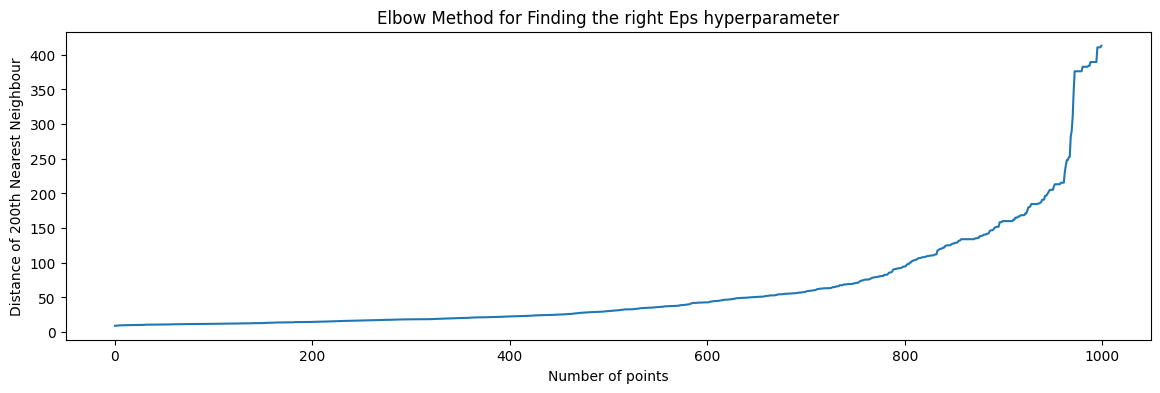

In [9]:
# Plotting for the Elbow Method :
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
# Hierarchical clustering
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(vectors,method='ward'))
plt.axhline(y=20)

In [ ]:
#Word2Vec
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np

# Preprocess the reviews into tokenized words
tokenized_reviews = [review.split() for review in reviews]

# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Convert each review to a vector by averaging the word vectors
review_vectors = []
for tokens in tokenized_reviews:
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if vectors:
        review_vector = np.mean(vectors, axis=0)
        review_vectors.append(review_vector)

# Convert review vectors to a numpy array
review_vectors = np.array(review_vectors)

# Apply K-means clustering to the review vectors
kmeans = KMeans(n_clusters=9)
kmeans.fit(review_vectors)

# Output the clustering results
print(f"Word2Vec Clustering Results: {kmeans.labels_}")


In [ ]:
#Bert
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize and encode each review
def encode_Review(Review):
    inputs = tokenizer(Review, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()

encoded_Reviews = [encode_Review(Review) for Review in Reviews]

# Convert encoded reviews to a numpy array
encoded_reviews = np.array(encoded_Reviews)

# Apply K-means clustering to the encoded reviews
kmeans = KMeans(n_clusters=9)
kmeans.fit(encoded_reviews)

# Output the clustering results
print(f"BERT Clustering Results: {kmeans.labels_}")


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.Clustering methods like K-means, DBSCAN, and hierarchical clustering group related data points in various fields. Word2Vec and BERT are word embeddings that provide semantic understanding, with BERT being particularly effective for contextual comprehension. While clustering focuses on grouping data points, Word2Vec and BERT capture semantic relationships. The choice between these approaches depends on the specific task and data characteristics.

.K-means clustering relies on the distance between data points and cluster centroids. DBSCAN performs clustering based on density, identifying regions where points are concentrated and separating them from empty spaces. Hierarchical clustering organizes clusters in layers, starting with each data point as its own cluster and then merging the closest clusters.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Experimenting with different algorithms provides insight into their strengths and limitations, helping to choose the best method for specific tasks.
Conducting 10-fold cross-validation ensures models are robust and perform well across different data splits.
Using diverse datasets like IMDB and Amazon reviews offers experience with various text data types and domains, valuable for real-world applications.
Practicing with different tools and libraries, such as scikit-learn, Word2Vec, and BERT, builds a comprehensive skill set in machine learning.





'''